# Métodos Numéricos 

**Nombre:** Luis Alexander Lema Delgado
**Materia:** Métodos Numéricos  
**Fecha:** 12/05/2025

### Spline cúbico natural

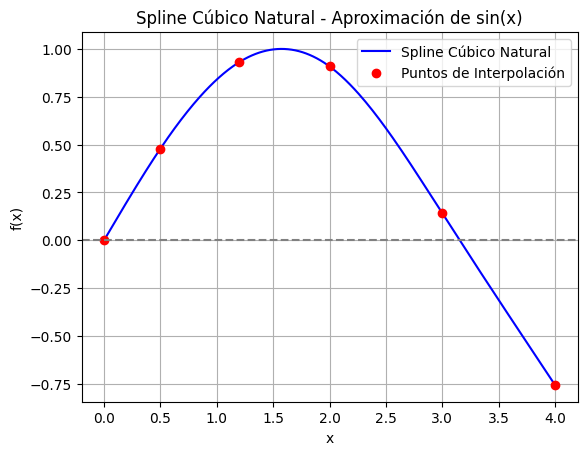

In [1]:
import matplotlib.pyplot as plt
import math

def spline_cubico_natural(x, y):
    """
    Método de Spline Cúbico Natural para interpolar puntos dados.

    :param x: Lista de coordenadas x de los puntos.
    :param y: Lista de coordenadas y de los puntos.
    :return: Gráfica de la interpolación por Spline Cúbico Natural.
    """
    n = len(x) - 1
    h = [x[i+1] - x[i] for i in range(n)]

    # Construir el sistema lineal
    A = [[0.0 for _ in range(n+1)] for _ in range(n+1)]
    b = [0.0 for _ in range(n+1)]

    A[0][0] = 1.0
    A[n][n] = 1.0

    for i in range(1, n):
        A[i][i-1] = h[i-1]
        A[i][i]   = 2 * (h[i-1] + h[i])
        A[i][i+1] = h[i]
        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    # Resolver el sistema (eliminación gaussiana simple)
    def resolver_sistema(A, b):
        n = len(b)
        for i in range(n):
            fila = max(range(i, n), key=lambda r: abs(A[r][i]))
            A[i], A[fila] = A[fila], A[i]
            b[i], b[fila] = b[fila], b[i]

            factor = A[i][i]
            for j in range(i, n):
                A[i][j] /= factor
            b[i] /= factor

            for k in range(i+1, n):
                f = A[k][i]
                for j in range(i, n):
                    A[k][j] -= f * A[i][j]
                b[k] -= f * b[i]

        sus = [0.0 for _ in range(n)]
        for i in range(n-1, -1, -1):
            sus[i] = b[i] - sum(A[i][j] * sus[j] for j in range(i+1, n))
        return sus

    c = resolver_sistema(A, b)

    a = y[:-1]
    b_coef = []
    d = []

    for i in range(n):
        bi = (y[i+1] - y[i]) / h[i] - h[i] * (2*c[i] + c[i+1]) / 3
        di = (c[i+1] - c[i]) / (3*h[i])
        b_coef.append(bi)
        d.append(di)

    x_vals = []
    y_vals = []
    for i in range(n):
        xi = x[i]
        xf = x[i+1]
        step = (xf - xi) / 50
        for j in range(51):
            xt = xi + j * step
            dx = xt - x[i]
            yt = a[i] + b_coef[i]*dx + c[i]*dx**2 + d[i]*dx**3
            x_vals.append(xt)
            y_vals.append(yt)

    plt.plot(x_vals, y_vals, label="Spline Cúbico Natural", color="blue")
    plt.plot(x, y, 'ro', label="Puntos de Interpolación")
    plt.axhline(0, color='gray', linestyle='--')
    plt.title("Spline Cúbico Natural - Aproximación de sin(x)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Nuevos puntos aproximando sin(x)
x = [0, 0.5, 1.2, 2.0, 3.0, 4.0]
y = [math.sin(xi) for xi in x]

spline_cubico_natural(x, y)



### Spline cúbico condicionado


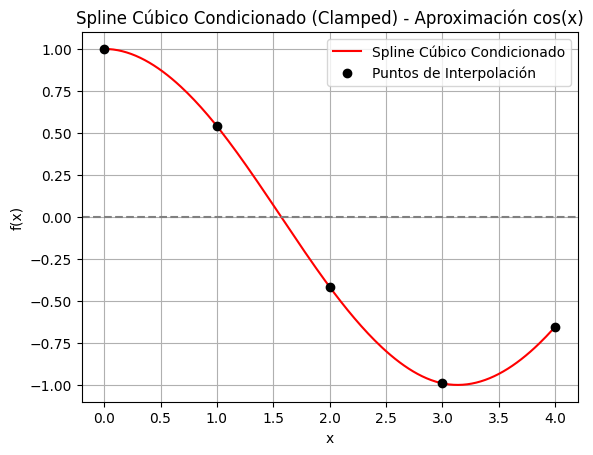

In [2]:
import matplotlib.pyplot as plt
import math

def spline_cubico_condicionado(x, y, fp0, fpn):
    n = len(x) - 1
    h = [x[i+1] - x[i] for i in range(n)]

    A = [[0.0 for _ in range(n+1)] for _ in range(n+1)]
    b = [0.0 for _ in range(n+1)]

    A[0][0] = 2 * h[0]
    A[0][1] = h[0]
    b[0] = 3 * ((y[1] - y[0]) / h[0] - fp0)

    A[n][n-1] = h[n-1]
    A[n][n] = 2 * h[n-1]
    b[n] = 3 * (fpn - (y[n] - y[n-1]) / h[n-1])

    for i in range(1, n):
        A[i][i-1] = h[i-1]
        A[i][i] = 2 * (h[i-1] + h[i])
        A[i][i+1] = h[i]
        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    def resolver_sistema(A, b):
        n = len(b)
        for i in range(n):
            fila = max(range(i, n), key=lambda r: abs(A[r][i]))
            A[i], A[fila] = A[fila], A[i]
            b[i], b[fila] = b[fila], b[i]
            factor = A[i][i]
            for j in range(i, n):
                A[i][j] /= factor
            b[i] /= factor
            for k in range(i+1, n):
                f = A[k][i]
                for j in range(i, n):
                    A[k][j] -= f * A[i][j]
                b[k] -= f * b[i]

        sus = [0.0 for _ in range(n)]
        for i in range(n-1, -1, -1):
            sus[i] = b[i] - sum(A[i][j] * sus[j] for j in range(i+1, n))
        return sus

    c = resolver_sistema(A, b)

    a = y[:-1]
    b_coef = []
    d = []

    for i in range(n):
        bi = (y[i+1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3
        di = (c[i+1] - c[i]) / (3 * h[i])
        b_coef.append(bi)
        d.append(di)

    x_vals = []
    y_vals = []
    for i in range(n):
        xi = x[i]
        xf = x[i+1]
        step = (xf - xi) / 50
        for j in range(51):
            xt = xi + j * step
            dx = xt - x[i]
            yt = a[i] + b_coef[i] * dx + c[i] * dx**2 + d[i] * dx**3
            x_vals.append(xt)
            y_vals.append(yt)

    plt.plot(x_vals, y_vals, label="Spline Cúbico Condicionado", color="red")
    plt.plot(x, y, 'ko', label="Puntos de Interpolación")
    plt.axhline(0, color='gray', linestyle='--')
    plt.title("Spline Cúbico Condicionado (Clamped) - Aproximación cos(x)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Nuevos puntos basados en cos(x)
x = [0, 1, 2, 3, 4]
y = [math.cos(xi) for xi in x]

# Derivadas coherentes con cos(x)
fp0 = -math.sin(x[0])  # derivada en x=0, -sin(0) = 0
fpn = -math.sin(x[-1]) # derivada en x=4

spline_cubico_condicionado(x, y, fp0, fpn)
